In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/DEV/Documents/Bank Customer Churn Prediction.csv')

In [3]:
df

customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

In [4]:
df.shape

(10000, 12)

There are total 10000 rows and 12 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
df.duplicated().sum()

0

There are no duplicated rows.

In [7]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [9]:
np.array(sorted(df['credit_score'].unique()))

array([350, 351, 358, 359, 363, 365, 367, 373, 376, 382, 383, 386, 395,
       399, 401, 404, 405, 407, 408, 410, 411, 412, 413, 414, 415, 416,
       417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
       482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494,
       495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507,
       508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520,
       521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533,
       534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546,
       547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559,
       560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 57

Credit score starts from 350 and goes till 850.

In [10]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

The data is from 3 unique countries france, spain, germany

In [11]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
np.array(sorted(df['age'].unique()))

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       88, 92], dtype=int64)

Minimum age is from 18 and goes till 92

In [16]:
np.array(sorted(df['tenure'].unique()))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

the duration of tenure is from 0 to 10

# EDA

## Univariate Analysis

<AxesSubplot:xlabel='credit_score', ylabel='Count'>

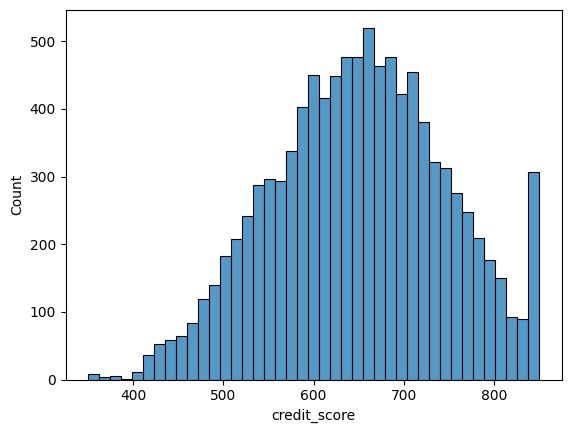

In [19]:
sns.histplot(data = df, x = 'credit_score')

In [20]:
sns.kdeplot(data = df, x = 'credit_score')

<AxesSubplot:xlabel='credit_score', ylabel='Density'>

In [21]:
df['credit_score'].skew()

-0.07160660820092675

In [22]:
df['credit_score'].mean()

650.5288

In [23]:
sns.boxplot(data = df, x = 'credit_score')

<AxesSubplot:xlabel='credit_score'>

From the graphs we have plotted we can say the following things about **'CREDIT_SCORE'** column

1. It is almost normal distribution. the skew is in 0.0 values.

2. The mean of the credit score is 650.

3. majority of the values lie in between 550 to 750.

4. There are few outliers in the data somewhere below 485-490.

<AxesSubplot:xlabel='country', ylabel='count'>

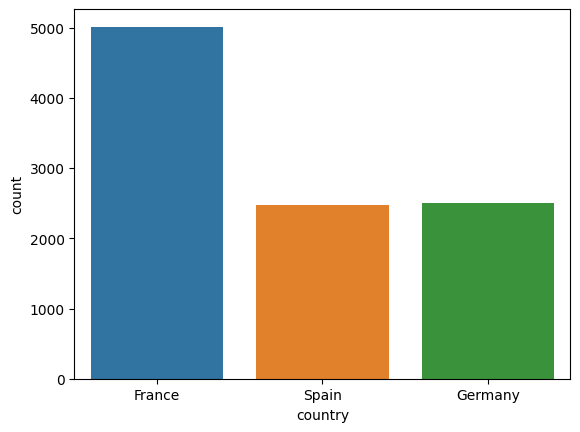

In [25]:
sns.countplot(data = df, x = 'country')

In [26]:
df['country'].value_counts().plot(kind = 'pie')

<AxesSubplot:ylabel='country'>

From the above two graphs we can say

1. 5000 people are from france

2. 2500 people are from germeny and spain respectively.

In [28]:
sns.countplot(data = df, x = 'gender')

<AxesSubplot:xlabel='gender', ylabel='count'>

In [29]:
df['gender'].value_counts().plot(kind = 'pie')

<AxesSubplot:ylabel='gender'>

Data is fairly balanced for the gender column.

<AxesSubplot:xlabel='age', ylabel='Count'>

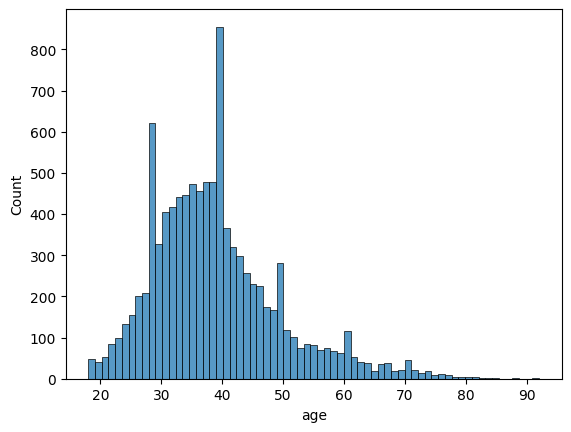

In [31]:
sns.histplot(data = df, x = 'age')

In [32]:
sns.kdeplot(data = df, x = 'age')

<AxesSubplot:xlabel='age', ylabel='Density'>

In [33]:
df['age'].skew()

1.0113202630234552

In [35]:
df['age'].mean()

38.9218

In [34]:
sns.boxplot(data = df, x = 'age')

<AxesSubplot:xlabel='age'>

From the above columns we can say the following things about **'AGE'** column.

1. The distribution is not normal

2. Data is right skewed.

3. There are outliers on the right side of the data.

4. The mean of the data is 38 years

In [37]:
sns.countplot(data = df, x = 'tenure')

<AxesSubplot:xlabel='tenure', ylabel='count'>

<AxesSubplot:ylabel='tenure'>

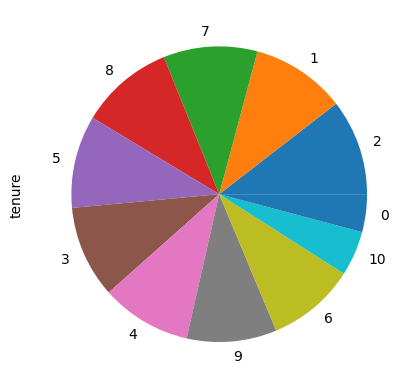

In [38]:
df['tenure'].value_counts().plot(kind = 'pie')

from the above graphs it can be seen that except for tenure = 0 or tenure = 10, other classes are fairly equal.

In [40]:
sns.histplot(data = df, x = 'balance')

<AxesSubplot:xlabel='balance', ylabel='Count'>

In [41]:
sns.kdeplot(data = df, x = 'balance')

<AxesSubplot:xlabel='balance', ylabel='Density'>

<AxesSubplot:xlabel='balance'>

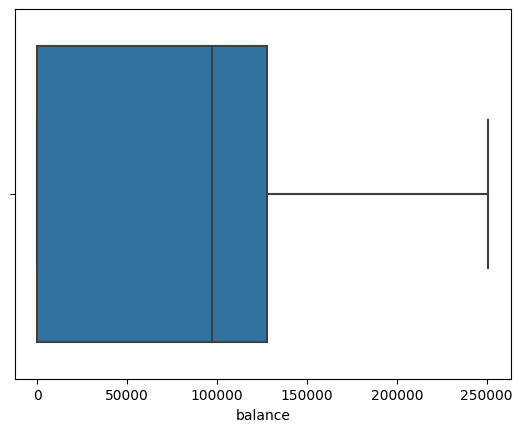

In [42]:
sns.boxplot(data = df, x = 'balance')

In [46]:
df['balance'].mean()

76485.889288

In [44]:
df['balance'].skew()

-0.14110871094154384

from the balance column we can conclude that

1. Data is fairly normal except a peak at -1000 to 1000

2. no outliers in the data

3. mean baalcne is around 76000

4. median balance is around 97000

5. Precisely 3617 people have balance equal to 0

In [54]:
df[df['balance'] == 0]

customer_id  credit_score country  gender  age  tenure  balance  \
0        15634602           619  France  Female   42       2      0.0   
3        15701354           699  France  Female   39       1      0.0   
6        15592531           822  France    Male   50       7      0.0   
11       15737173           497   Spain    Male   24       3      0.0   
12       15632264           476  France  Female   34      10      0.0   
...           ...           ...     ...     ...  ...     ...      ...   
9989     15605622           841   Spain    Male   28       4      0.0   
9992     15657105           726   Spain    Male   36       2      0.0   
9994     15719294           800  France  Female   29       2      0.0   
9995     15606229           771  France    Male   39       5      0.0   
9997     15584532           709  France  Female   36       7      0.0   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
3                   2            0              0          93826.63      0  
6                   2            1              1          10062.80      0  
11                  2            1              0          76390.01      0  
12                  2            1              0          26260.98      0  
...               ...          ...            ...               ...    ...  
9989                2            1              1         179436.60      0  
9992                1            1              0         195192.40      0  
9994                2            0              0         167773.55      0  
9995                2            1              0          96270.64      0  
9997                1            0              1          42085.58      1  

[3617 rows x 12 columns]

<AxesSubplot:xlabel='products_number', ylabel='count'>

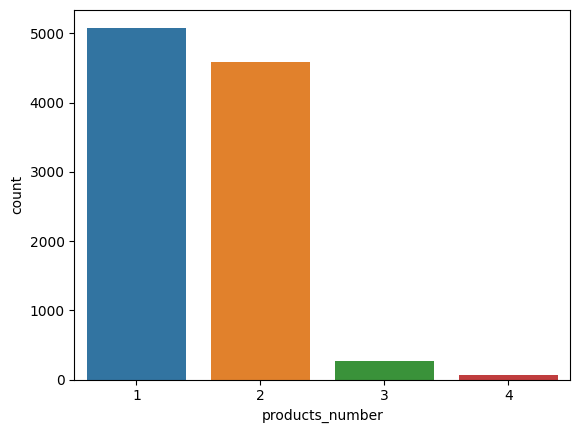

In [55]:
sns.countplot(data = df, x = 'products_number')

<AxesSubplot:ylabel='products_number'>

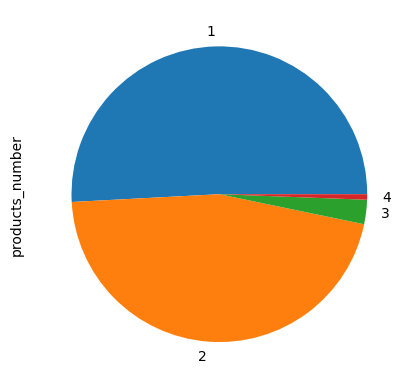

In [58]:
df['products_number'].value_counts().plot(kind = 'pie')

From the above data we can say that majority of the data has prodcuts number equal to 1. very few people have 3 and 4 products number(266 & 60 respectively).

<AxesSubplot:ylabel='credit_card'>

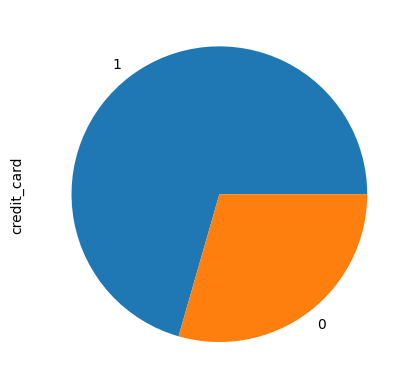

In [62]:
df['credit_card'].value_counts().plot(kind = 'pie')

Majority around 7100 people own a credit card.

<AxesSubplot:ylabel='active_member'>

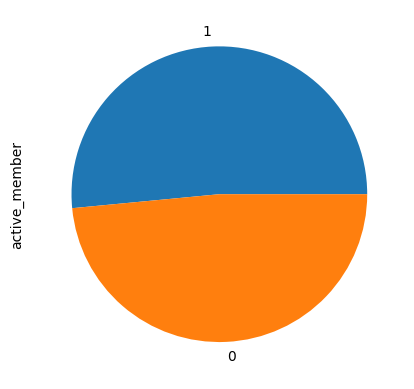

In [65]:
df['active_member'].value_counts().plot(kind = 'pie')

This column is fairly balanced with respect to values

<AxesSubplot:xlabel='estimated_salary', ylabel='Count'>

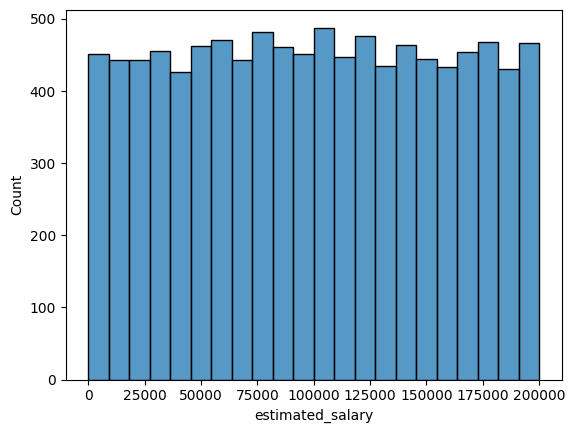

In [67]:
sns.histplot(data = df, x = 'estimated_salary')

<AxesSubplot:xlabel='estimated_salary', ylabel='Density'>

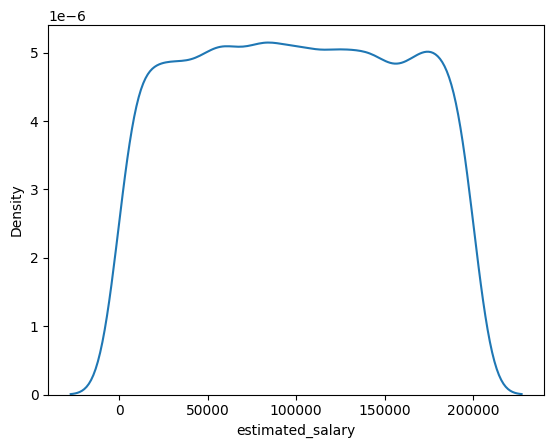

In [68]:
sns.kdeplot(data = df, x = 'estimated_salary')

In [69]:
df['estimated_salary'].skew()

0.0020853576615585162

In [70]:
sns.boxplot(data = df, x ='estimated_salary')

<AxesSubplot:xlabel='estimated_salary'>

In [71]:
df['estimated_salary'].mean()

100090.239881

1. There are no outliers in the data.

2. The mean/ median salry is almost equal around 100000.

3. The distribution can be considered as normal.

In [73]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

## Bivariate Analysis

In [76]:
df.corr()

customer_id  credit_score       age    tenure   balance  \
customer_id          1.000000      0.005308  0.009497 -0.014883 -0.012419   
credit_score         0.005308      1.000000 -0.003965  0.000842  0.006268   
age                  0.009497     -0.003965  1.000000 -0.009997  0.028308   
tenure              -0.014883      0.000842 -0.009997  1.000000 -0.012254   
balance             -0.012419      0.006268  0.028308 -0.012254  1.000000   
products_number      0.016972      0.012238 -0.030680  0.013444 -0.304180   
credit_card         -0.014025     -0.005458 -0.011721  0.022583 -0.014858   
active_member        0.001665      0.025651  0.085472 -0.028362 -0.010084   
estimated_salary     0.015271     -0.001384 -0.007201  0.007784  0.012797   
churn               -0.006248     -0.027094  0.285323 -0.014001  0.118533   

                  products_number  credit_card  active_member  \
customer_id              0.016972    -0.014025       0.001665   
credit_score             0.012238    -0.005458       0.025651   
age                     -0.030680    -0.011721       0.085472   
tenure                   0.013444     0.022583      -0.028362   
balance                 -0.304180    -0.014858      -0.010084   
products_number          1.000000     0.003183       0.009612   
credit_card              0.003183     1.000000      -0.011866   
active_member            0.009612    -0.011866       1.000000   
estimated_salary         0.014204    -0.009933      -0.011421   
churn                   -0.047820    -0.007138      -0.156128   

                  estimated_salary     churn  
customer_id               0.015271 -0.006248  
credit_score             -0.001384 -0.027094  
age                      -0.007201  0.285323  
tenure                    0.007784 -0.014001  
balance                   0.012797  0.118533  
products_number           0.014204 -0.047820  
credit_card              -0.009933 -0.007138  
active_member            -0.011421 -0.156128  
estimated_salary          1.000000  0.012097  
churn                     0.012097  1.000000

We will First developed a model without performing any standardization, removing outliers or anything.

We will check the accuracy of the model.

if the accuracy is less than 70 then we will perform standardization, removing outliers. and then develope the model

once the model reaches an accuracy of 70 we will tune the hyperparamters.

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [208]:
x = df1.drop(columns = ['churn'],axis = 1)
y = df1['churn']

In [209]:
x = pd.get_dummies(x)
x

credit_score  age  tenure    balance  products_number  credit_card  \
0              619   42       2       0.00                1            1   
1              608   41       1   83807.86                1            0   
2              502   42       8  159660.80                3            1   
3              699   39       1       0.00                2            0   
4              850   43       2  125510.82                1            1   
...            ...  ...     ...        ...              ...          ...   
9995           771   39       5       0.00                2            1   
9996           516   35      10   57369.61                1            1   
9997           709   36       7       0.00                1            0   
9998           772   42       3   75075.31                2            1   
9999           792   28       4  130142.79                1            1   

      active_member  estimated_salary  country_France  country_Germany  \
0                 1         101348.88               1                0   
1                 1         112542.58               0                0   
2                 0         113931.57               1                0   
3                 0          93826.63               1                0   
4                 1          79084.10               0                0   
...             ...               ...             ...              ...   
9995              0          96270.64               1                0   
9996              1         101699.77               1                0   
9997              1          42085.58               1                0   
9998              0          92888.52               0                1   
9999              0          38190.78               1                0   

      country_Spain  gender_Female  gender_Male  
0                 0              1            0  
1                 1              1            0  
2                 0              1            0  
3                 0              1            0  
4                 1              1            0  
...             ...            ...          ...  
9995              0              0            1  
9996              0              0            1  
9997              0              1            0  
9998              0              0            1  
9999              0              1            0  

[9474 rows x 13 columns]

In [210]:
x = x.drop(columns = ['country_Spain','gender_Female'],axis = 1)

In [211]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 9474, dtype: int64

In [212]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.21, random_state = 42)

In [213]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ab = AdaBoostClassifier()

In [214]:
lr.fit(x_train,y_train)

LogisticRegression()

In [215]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [216]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [217]:
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [218]:
lr_pred = lr.predict(x_test)

In [219]:
dt_pred = dt.predict(x_test)

In [220]:
rf_pred = rf.predict(x_test)

In [221]:
ab_pred = ab.predict(x_test)

In [222]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

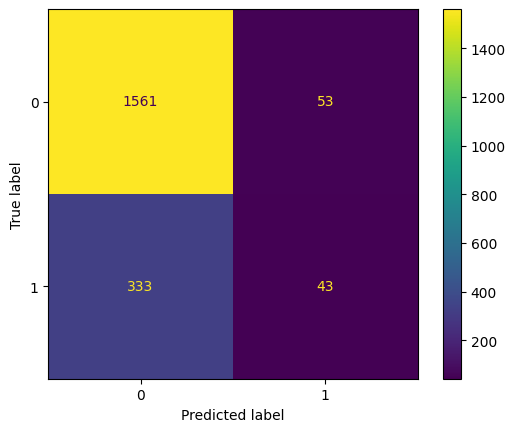

In [223]:
cm = confusion_matrix(y_test,lr_pred)
ConfusionMatrixDisplay(cm).plot()

In [224]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1614
           1       0.45      0.11      0.18       376

    accuracy                           0.81      1990
   macro avg       0.64      0.54      0.54      1990
weighted avg       0.75      0.81      0.76      1990



In [225]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1614
           1       0.45      0.48      0.47       376

    accuracy                           0.79      1990
   macro avg       0.66      0.67      0.67      1990
weighted avg       0.80      0.79      0.79      1990



In [226]:
cm_1 = confusion_matrix(y_test,dt_pred)
ConfusionMatrixDisplay(cm_1).plot()

In [227]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1614
           1       0.72      0.48      0.57       376

    accuracy                           0.87      1990
   macro avg       0.80      0.72      0.75      1990
weighted avg       0.86      0.87      0.86      1990



In [228]:
cm2 = confusion_matrix(y_test,rf_pred)
ConfusionMatrixDisplay(cm2).plot()

In [229]:
print(classification_report(y_test,ab_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1614
           1       0.71      0.52      0.60       376

    accuracy                           0.87      1990
   macro avg       0.80      0.74      0.76      1990
weighted avg       0.86      0.87      0.86      1990



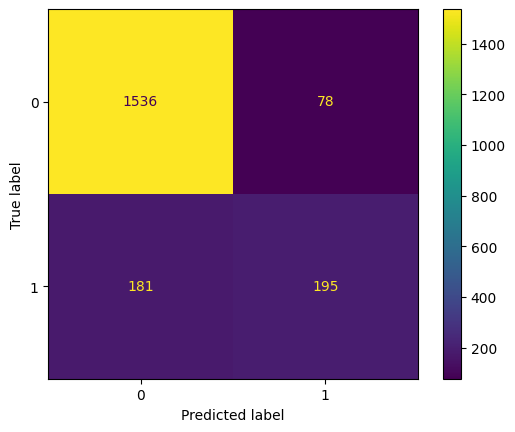

In [230]:
cm3 = confusion_matrix(y_test,ab_pred)
ConfusionMatrixDisplay(cm3).plot()

In [205]:
df

customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

In [207]:
df1 = df[df['age'] < 60]
df1 = df1.drop(columns = ['customer_id'],axis =1)